In [2]:
### Prep for the call on 07/14/23. Please bare in mind that in this notebook I have used a file that is on my local machine in order to create the 
### data frames - myDF and myDF2. In order to run successfully on ANVIL the correct file path needs to be supplied.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reding csv file containing 243 subjects and their raw TPM counts across 1059 genes
### Source of data
myDF = pd.read_excel("C:/Users/filip/OneDrive/Desktop/Molecular Stethoscope/Summer/ClusterMarkers_1819ADcohort.xlsx", sheet_name = 1)
# setting index row name to the gene id
myDF = myDF.set_index('gene_id')
myDF2 = pd.read_excel("C:/Users/filip/OneDrive/Desktop/Molecular Stethoscope/Summer/ClusterMarkers_1819ADcohort.xlsx", sheet_name = 0)

In [3]:
diagnosis= myDF2["Disease"]

In [4]:
#diagnosis

In [5]:
#Filtering out rows: discarding the ERCC rows, ERCC is a control protocol for validation of RNA sequencing
Patients_df = myDF[~myDF.loc[:,'Coeff'].isnull()]

# We store the coefficients(betas) of the linear classifier in an array.
coefficients = np.nan_to_num(np.array(Patients_df.loc[:, "Coeff"]))

# Filtering out columns with patient data
Patients_df = Patients_df.filter(regex='^\d+')

In [6]:
Patients_df

,11174-r1,11178-r1,11182-r1,11182-r2,11186-r1,11186-r2,11190-r1,11190-r2,11194-r1,11194-r2,...,5673-r1,5683-r1,5683-r2,5702-r1,5706-r1,5706-r2,5767-r1,5767-r2,5784-r1,5784-r2
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000079482.12,40.167869,43.221009,102.123100,82.137419,59.941767,13.792904,72.000992,56.627618,68.009413,59.382986,...,14.666869,43.060290,38.813183,299.701309,13.634830,20.578772,12.370367,2.007663,10.735082,9.461999
ENSG00000169021.5,4.669515,8.401576,6.827512,9.261443,11.148535,4.445162,5.426358,3.210182,9.386716,6.226777,...,12.342026,9.796506,11.453942,7.469338,9.483267,14.372476,17.178199,15.817280,11.460425,17.641014
ENSG00000204160.11,91.808686,52.448546,105.386495,48.958301,32.223227,33.497053,29.494519,30.000614,71.504342,32.527289,...,37.958158,51.737799,35.491274,33.142251,53.717439,39.271420,55.816251,25.256624,58.390142,36.782660
ENSG00000106780.8,44.561230,8.633877,19.836541,21.810697,9.518698,5.770501,9.937019,4.144054,13.294896,12.279378,...,7.649485,4.687122,7.255049,3.887344,15.858130,15.278658,12.566394,16.028029,15.729589,12.027964
ENSG00000113303.11,3.803395,2.503695,10.826006,3.646693,7.922817,0.000000,5.855945,5.544861,8.926236,7.141199,...,2.506974,7.199588,3.840127,0.000000,5.215797,6.975498,0.804744,3.704749,4.051561,0.893506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000105327.15,11.975046,15.099606,19.157131,12.294565,11.918180,11.740389,21.818483,17.836941,16.211272,3.755661,...,26.794624,19.424107,10.550382,14.433673,32.854251,26.363588,12.597346,12.134715,17.045569,19.680041
ENSG00000044115.20,79.808535,90.055599,150.695337,83.364560,101.977969,46.140548,76.511653,44.650719,58.587276,77.061808,...,58.892462,131.904468,125.647880,119.415452,91.049899,100.048869,175.331122,63.324580,215.002140,67.333689
ENSG00000065978.17,586.689385,1025.663329,858.495631,699.377835,917.722489,774.068093,1220.681923,969.942034,915.399619,785.684265,...,1531.364709,1092.743272,750.007292,998.342770,1378.371770,1084.890100,1466.966627,1125.500399,1341.564033,955.604578


In [7]:
Patients_df.sort_index(axis=1, inplace=True)

In [8]:
Patients_df

,11174-r1,11178-r1,11182-r1,11182-r2,11186-r1,11186-r2,11190-r1,11190-r2,11194-r1,11194-r2,...,5673-r1,5683-r1,5683-r2,5702-r1,5706-r1,5706-r2,5767-r1,5767-r2,5784-r1,5784-r2
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000079482.12,40.167869,43.221009,102.123100,82.137419,59.941767,13.792904,72.000992,56.627618,68.009413,59.382986,...,14.666869,43.060290,38.813183,299.701309,13.634830,20.578772,12.370367,2.007663,10.735082,9.461999
ENSG00000169021.5,4.669515,8.401576,6.827512,9.261443,11.148535,4.445162,5.426358,3.210182,9.386716,6.226777,...,12.342026,9.796506,11.453942,7.469338,9.483267,14.372476,17.178199,15.817280,11.460425,17.641014
ENSG00000204160.11,91.808686,52.448546,105.386495,48.958301,32.223227,33.497053,29.494519,30.000614,71.504342,32.527289,...,37.958158,51.737799,35.491274,33.142251,53.717439,39.271420,55.816251,25.256624,58.390142,36.782660
ENSG00000106780.8,44.561230,8.633877,19.836541,21.810697,9.518698,5.770501,9.937019,4.144054,13.294896,12.279378,...,7.649485,4.687122,7.255049,3.887344,15.858130,15.278658,12.566394,16.028029,15.729589,12.027964
ENSG00000113303.11,3.803395,2.503695,10.826006,3.646693,7.922817,0.000000,5.855945,5.544861,8.926236,7.141199,...,2.506974,7.199588,3.840127,0.000000,5.215797,6.975498,0.804744,3.704749,4.051561,0.893506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000105327.15,11.975046,15.099606,19.157131,12.294565,11.918180,11.740389,21.818483,17.836941,16.211272,3.755661,...,26.794624,19.424107,10.550382,14.433673,32.854251,26.363588,12.597346,12.134715,17.045569,19.680041
ENSG00000044115.20,79.808535,90.055599,150.695337,83.364560,101.977969,46.140548,76.511653,44.650719,58.587276,77.061808,...,58.892462,131.904468,125.647880,119.415452,91.049899,100.048869,175.331122,63.324580,215.002140,67.333689
ENSG00000065978.17,586.689385,1025.663329,858.495631,699.377835,917.722489,774.068093,1220.681923,969.942034,915.399619,785.684265,...,1531.364709,1092.743272,750.007292,998.342770,1378.371770,1084.890100,1466.966627,1125.500399,1341.564033,955.604578


In [9]:
patient_id= list(Patients_df.columns.values)

In [10]:
#patient_id

In [11]:
Patients_df['Mean']= Patients_df.mean(axis=1)
Patients_df['Std']=Patients_df.iloc[:,:-1].std(axis=1)
Patients_df['RSD'] = (Patients_df['Std'] / Patients_df['Mean'])*100 # New code Filip

Patients_df.head()
#print(Patients_df.shape)

,11174-r1,11178-r1,11182-r1,11182-r2,11186-r1,11186-r2,11190-r1,11190-r2,11194-r1,11194-r2,...,5702-r1,5706-r1,5706-r2,5767-r1,5767-r2,5784-r1,5784-r2,Mean,Std,RSD
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000079482.12,40.167869,43.221009,102.123100,82.137419,59.941767,13.792904,72.000992,56.627618,68.009413,59.382986,...,299.701309,13.634830,20.578772,12.370367,2.007663,10.735082,9.461999,54.796436,92.668927,169.114881
ENSG00000169021.5,4.669515,8.401576,6.827512,9.261443,11.148535,4.445162,5.426358,3.210182,9.386716,6.226777,...,7.469338,9.483267,14.372476,17.178199,15.817280,11.460425,17.641014,10.534654,3.942261,37.421833
ENSG00000204160.11,91.808686,52.448546,105.386495,48.958301,32.223227,33.497053,29.494519,30.000614,71.504342,32.527289,...,33.142251,53.717439,39.271420,55.816251,25.256624,58.390142,36.782660,60.139569,74.543282,123.950476
ENSG00000106780.8,44.561230,8.633877,19.836541,21.810697,9.518698,5.770501,9.937019,4.144054,13.294896,12.279378,...,3.887344,15.858130,15.278658,12.566394,16.028029,15.729589,12.027964,15.425324,19.016376,123.280241
ENSG00000113303.11,3.803395,2.503695,10.826006,3.646693,7.922817,0.000000,5.855945,5.544861,8.926236,7.141199,...,0.000000,5.215797,6.975498,0.804744,3.704749,4.051561,0.893506,5.592945,6.745163,120.601278


In [12]:
rsd= Patients_df["RSD"]
rsd= list(rsd)
rsd[0]

169.11488083304965

In [13]:
sum(float(num) >=50  for num in rsd)

738

In [14]:
# We define a function whose input is TPM and outputs the corresponding Zscore
def z_score(x):
    return (x-x['Mean'])/x['Std']

In [15]:
# Computing and storing zscores
Patients_df_zScore = Patients_df.apply(lambda x: z_score(x), axis=1)
Patients_df_zScore.head()
#print(Patients_df_zScore.shape)

,11174-r1,11178-r1,11182-r1,11182-r2,11186-r1,11186-r2,11190-r1,11190-r2,11194-r1,11194-r2,...,5702-r1,5706-r1,5706-r2,5767-r1,5767-r2,5784-r1,5784-r2,Mean,Std,RSD
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000079482.12,-0.157858,-0.124912,0.510707,0.295039,0.055524,-0.442473,0.185656,0.019760,0.142583,0.049494,...,2.642794,-0.444179,-0.369246,-0.457824,-0.569649,-0.475471,-0.489209,0.0,0.408686,1.233622
ENSG00000169021.5,-1.487760,-0.541080,-0.940359,-0.322965,0.155718,-1.544670,-1.295778,-1.857937,-0.291188,-1.092743,...,-0.777553,-0.266697,0.973508,1.685212,1.339999,0.234833,1.802610,0.0,-1.672237,6.820244
ENSG00000204160.11,0.424842,-0.103175,0.606989,-0.149997,-0.374498,-0.357410,-0.411104,-0.404315,0.152459,-0.370419,...,-0.362170,-0.086153,-0.279947,-0.057997,-0.467956,-0.023469,-0.313334,0.0,0.193226,0.856025
ENSG00000106780.8,1.532148,-0.357137,0.231969,0.335783,-0.310607,-0.507711,-0.288609,-0.593240,-0.112031,-0.165433,...,-0.606739,0.022760,-0.007713,-0.150340,0.031694,0.016000,-0.178654,0.0,0.188840,5.671686
ENSG00000113303.11,-0.265309,-0.457995,0.775824,-0.288540,0.345414,-0.829179,0.038991,-0.007129,0.494175,0.229535,...,-0.829179,-0.055914,0.204969,-0.709872,-0.279933,-0.228517,-0.696712,0.0,0.170821,17.050489


In [16]:
Patients_df= Patients_df.set_index([ 'Mean', 'Std', 'RSD'])    
Patients_df.head()

,,,11174-r1,11178-r1,11182-r1,11182-r2,11186-r1,11186-r2,11190-r1,11190-r2,11194-r1,11194-r2,...,5673-r1,5683-r1,5683-r2,5702-r1,5706-r1,5706-r2,5767-r1,5767-r2,5784-r1,5784-r2
Mean,Std,RSD,,,,,,,,,,,,,,,,,,,,,
54.796436,92.668927,169.114881,40.167869,43.221009,102.123100,82.137419,59.941767,13.792904,72.000992,56.627618,68.009413,59.382986,...,14.666869,43.060290,38.813183,299.701309,13.634830,20.578772,12.370367,2.007663,10.735082,9.461999
10.534654,3.942261,37.421833,4.669515,8.401576,6.827512,9.261443,11.148535,4.445162,5.426358,3.210182,9.386716,6.226777,...,12.342026,9.796506,11.453942,7.469338,9.483267,14.372476,17.178199,15.817280,11.460425,17.641014
60.139569,74.543282,123.950476,91.808686,52.448546,105.386495,48.958301,32.223227,33.497053,29.494519,30.000614,71.504342,32.527289,...,37.958158,51.737799,35.491274,33.142251,53.717439,39.271420,55.816251,25.256624,58.390142,36.782660
15.425324,19.016376,123.280241,44.561230,8.633877,19.836541,21.810697,9.518698,5.770501,9.937019,4.144054,13.294896,12.279378,...,7.649485,4.687122,7.255049,3.887344,15.858130,15.278658,12.566394,16.028029,15.729589,12.027964
5.592945,6.745163,120.601278,3.803395,2.503695,10.826006,3.646693,7.922817,0.000000,5.855945,5.544861,8.926236,7.141199,...,2.506974,7.199588,3.840127,0.000000,5.215797,6.975498,0.804744,3.704749,4.051561,0.893506


Step 3: Defining Monte Carlo simulation and classifier functions using RSD

In [17]:
#np.random.seed(46215423)

#SImulation using gene-specific RSD
def RSD_simulation(subject, rsd, coefficient):
    score=0
    subject_list = list(subject)
    for i in range (len(subject_list)):
        std= rsd[i]/100 * subject_list[i]
        std = np.abs(std)
        sum_number= (coefficients[i]) * int(np.random.normal(subject_list[i], std, size=1))
        score= score+ sum_number
    return(score)
        
# Sampling function performing the Monte Carlo simulations
def Simulation(means, rsd, coefficients):
    std= [rsd/100 * val for val in means]
    std = np.abs(std)
    return np.sum(np.multiply(coefficients, np.random.normal(means, std, size=(1, len(coefficients)))))

# Function to perform anti-logit operation on the linear score 
def cl_score(linear_score, gamma = 0):
    temp = gamma + linear_score
    classifier_score = np.exp(temp) / (1 + np.exp(temp))
    return classifier_score

# Function to calculate subject wise mean and rsd of simulated scores 
def run_sim_one_patient_mean_sd(col):
    temp_Sim = [RSD_simulation(col, rsd, coefficients) for _ in range(numRuns)]
    return [np.mean(temp_Sim),np.std(temp_Sim)]

# Function to calculate the classifier score for each simulation of "num_runs" simulations, corresponding to each subject
def run_sim_one_patient(col, num_runs):
    temp_Sim = np.asarray([cl_score(RSD_simulation(col, rsd, coefficients)) for _ in range(num_runs)])
    return temp_Sim

# This score is the classifer linear score we want to compare with the simulated scores
def linear_score(coefficients, col):
    linear_score = np.sum(coefficients * col, axis=0)
    return linear_score

In [18]:
num_runs = 100
uncertainty = 25
thresh = 0.04874941

In [19]:
#for i in range(len(Patients_df.columns)):
 #       scores = run_sim_one_patient(Patients_df_zScore.iloc[:, i], num_runs)
  #      lin_score = cl_score(linear_score(coefficients, Patients_df_zScore.iloc[:, i]))

In [20]:
#for i in range(len(Patients_df.columns)):
 #   scores = run_sim_one_patient(Patients_df_zScore.iloc[:, i], num_runs)
  #  lin_score = linear_score(coefficients, Patients_df_zScore.iloc[:, i])

In [21]:

def create_linear_scores_df(coefficients, Patients_df_zScore):
    linear_scores = pd.DataFrame(index=Patients_df_zScore.index, columns=Patients_df_zScore.columns)
    
    for subject in Patients_df_zScore.columns:
        linear_scores[subject] = linear_score(coefficients, Patients_df_zScore[subject])
    
    return linear_scores


In [22]:
linear_scores_df = create_linear_scores_df(coefficients, Patients_df_zScore)
#print(linear_scores_df)

In [23]:
linear_scores_transformed_df = linear_scores_df.melt(var_name='Subject ID', value_name='Linnear Score')
#linear_scores_transformed_df.shape
linear_scores_transformed_df.head()

,Subject ID,Linnear Score
0,11174-r1,16.264934
1,11174-r1,16.264934
2,11174-r1,16.264934
3,11174-r1,16.264934
4,11174-r1,16.264934


In [24]:
linear_scores_transformed_df_cleaned = linear_scores_transformed_df.drop_duplicates(subset='Subject ID')
print(linear_scores_transformed_df_cleaned)


       Subject ID  Linnear Score
0        11174-r1      16.264934
967      11178-r1      -5.578192
1934     11182-r1       7.954470
2901     11182-r2       4.943839
3868     11186-r1       5.452781
...           ...            ...
324912    5784-r1      -4.822980
325879    5784-r2      -1.212098
326846       Mean       0.000000
327813        Std       0.445879
328780        RSD    -242.759602

[341 rows x 2 columns]


In [25]:
def create_probability_scores_df(coefficients, Patients_df_zScore):
    probability_scores = pd.DataFrame(index=Patients_df_zScore.index, columns=Patients_df_zScore.columns)
    
    for subject in Patients_df_zScore.columns:
        linear_scores = linear_score(coefficients, Patients_df_zScore[subject])
        probability_scores[subject] = cl_score(linear_scores)
    
    return probability_scores

In [26]:
prob_scores_df = create_probability_scores_df(coefficients, Patients_df_zScore)

In [27]:
#print(prob_scores_df)

In [28]:
prob_scores_transformed_df = prob_scores_df.melt(var_name='Subject ID', value_name='Prob Score')
#prob_scores_transformed_df.shape
#prob_scores_transformed_df.head()

In [29]:
prob_scores_transformed_df_cleaned = prob_scores_transformed_df.drop_duplicates(subset='Subject ID')
print(prob_scores_transformed_df_cleaned)

       Subject ID     Prob Score
0        11174-r1   9.999999e-01
967      11178-r1   3.765162e-03
1934     11182-r1   9.996490e-01
2901     11182-r2   9.929233e-01
3868     11186-r1   9.957339e-01
...           ...            ...
324912    5784-r1   7.978617e-03
325879    5784-r2   2.293300e-01
326846       Mean   5.000000e-01
327813        Std   6.096590e-01
328780        RSD  3.722583e-106

[341 rows x 2 columns]


In [30]:
def calculate_classifier_scores(coefficients, Patients_df_zScore):
    classifier_scores = pd.DataFrame(index=Patients_df_zScore.index, columns=Patients_df_zScore.columns)
    
    for subject in Patients_df_zScore.columns:
        linear_scores = linear_score(coefficients, Patients_df_zScore[subject])
        classifier_scores[subject] = cl_score(linear_scores)
    
    return classifier_scores

In [31]:
def create_classifier_scores_df(coefficients, Patients_df_zScore):
    classifier_scores = pd.DataFrame(index=Patients_df_zScore.index, columns=Patients_df_zScore.columns)
    
    for subject in Patients_df_zScore.columns:
        linear_scores = linear_score(coefficients, Patients_df_zScore[subject])
        classifier_scores[subject] = cl_score(linear_scores)
    
    return classifier_scores


In [32]:
classifier_scores_df = create_classifier_scores_df(coefficients, Patients_df_zScore)

classifier_scores_df.to_excel('ClassScore1.xlsx', index=True)

In [33]:
classifier_scores_df.head()

,11174-r1,11178-r1,11182-r1,11182-r2,11186-r1,11186-r2,11190-r1,11190-r2,11194-r1,11194-r2,...,5702-r1,5706-r1,5706-r2,5767-r1,5767-r2,5784-r1,5784-r2,Mean,Std,RSD
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000079482.12,1.0,0.003765,0.999649,0.992923,0.995734,0.008506,0.991476,0.437375,0.983581,0.849168,...,0.000708,0.002287,0.001297,0.000036,0.002186,0.007979,0.22933,0.5,0.609659,3.722583e-106
ENSG00000169021.5,1.0,0.003765,0.999649,0.992923,0.995734,0.008506,0.991476,0.437375,0.983581,0.849168,...,0.000708,0.002287,0.001297,0.000036,0.002186,0.007979,0.22933,0.5,0.609659,3.722583e-106
ENSG00000204160.11,1.0,0.003765,0.999649,0.992923,0.995734,0.008506,0.991476,0.437375,0.983581,0.849168,...,0.000708,0.002287,0.001297,0.000036,0.002186,0.007979,0.22933,0.5,0.609659,3.722583e-106
ENSG00000106780.8,1.0,0.003765,0.999649,0.992923,0.995734,0.008506,0.991476,0.437375,0.983581,0.849168,...,0.000708,0.002287,0.001297,0.000036,0.002186,0.007979,0.22933,0.5,0.609659,3.722583e-106
ENSG00000113303.11,1.0,0.003765,0.999649,0.992923,0.995734,0.008506,0.991476,0.437375,0.983581,0.849168,...,0.000708,0.002287,0.001297,0.000036,0.002186,0.007979,0.22933,0.5,0.609659,3.722583e-106


In [34]:
transformed_df = classifier_scores_df.melt(var_name='Subject ID', value_name='Classifier Score')
transformed_df.to_excel('ClassScore.xlsx', index=False)
#print(transformed_df)
transformed_df.shape
transformed_df.head()

,Subject ID,Classifier Score
0,11174-r1,1.0
1,11174-r1,1.0
2,11174-r1,1.0
3,11174-r1,1.0
4,11174-r1,1.0


In [35]:
transformed_df_cleaned = transformed_df.drop_duplicates(subset='Subject ID')
print(transformed_df_cleaned)


       Subject ID  Classifier Score
0        11174-r1      9.999999e-01
967      11178-r1      3.765162e-03
1934     11182-r1      9.996490e-01
2901     11182-r2      9.929233e-01
3868     11186-r1      9.957339e-01
...           ...               ...
324912    5784-r1      7.978617e-03
325879    5784-r2      2.293300e-01
326846       Mean      5.000000e-01
327813        Std      6.096590e-01
328780        RSD     3.722583e-106

[341 rows x 2 columns]


In [36]:
myDF_MMSE = pd.read_excel("C:/Users/filip/OneDrive/Desktop/Molecular Stethoscope/Summer/MMSE_AD_data.xlsx")

In [37]:
myDF_MMSE.head()

,Sample ID,MMSE
0,11174-r1,18.0
1,11178-r1,18.0
2,11182-r1,12.0
3,11182-r2,12.0
4,11186-r1,23.0


In [38]:
class_score_sampleid = transformed_df_cleaned.rename(columns={'Subject ID': 'Sample ID', 'Classifier Score': 'Class Score'})
print(class_score_sampleid)

       Sample ID    Class Score
0       11174-r1   9.999999e-01
967     11178-r1   3.765162e-03
1934    11182-r1   9.996490e-01
2901    11182-r2   9.929233e-01
3868    11186-r1   9.957339e-01
...          ...            ...
324912   5784-r1   7.978617e-03
325879   5784-r2   2.293300e-01
326846      Mean   5.000000e-01
327813       Std   6.096590e-01
328780       RSD  3.722583e-106

[341 rows x 2 columns]


In [39]:
merged_df = class_score_sampleid.merge(myDF_MMSE, on='Sample ID')
merged_df.head()

,Sample ID,Class Score,MMSE
0,11174-r1,1.000000,18.0
1,11178-r1,0.003765,18.0
2,11182-r1,0.999649,12.0
3,11182-r2,0.992923,12.0
4,11186-r1,0.995734,23.0


In [40]:
merged_df.to_excel('MMSE_ClassScore.xlsx', index=False)

In [41]:
merged_df.head()

,Sample ID,Class Score,MMSE
0,11174-r1,1.000000,18.0
1,11178-r1,0.003765,18.0
2,11182-r1,0.999649,12.0
3,11182-r2,0.992923,12.0
4,11186-r1,0.995734,23.0


In [42]:
Class_MMSE_df = merged_df.copy()

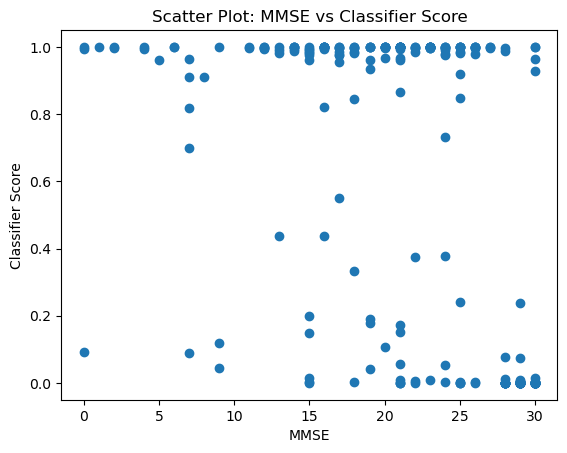

In [43]:
import matplotlib.pyplot as plt # scatter

plt.scatter(merged_df['MMSE'], merged_df['Class Score'])
plt.xlabel('MMSE')
plt.ylabel('Classifier Score')
plt.title('Scatter Plot: MMSE vs Classifier Score')
plt.show()


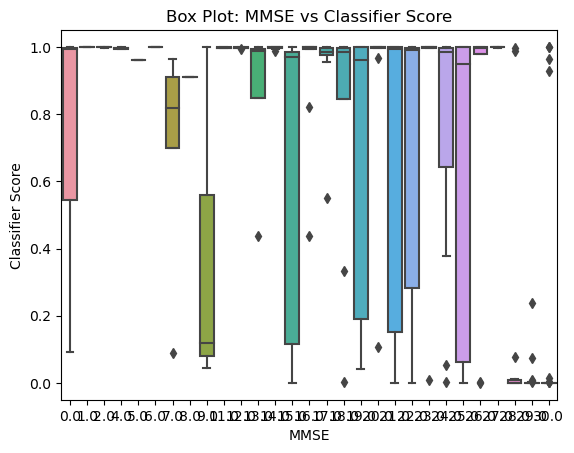

In [44]:
#Box Plot
import seaborn as sns

sns.boxplot(x=merged_df['MMSE'], y=merged_df['Class Score'])
plt.xlabel('MMSE')
plt.ylabel('Classifier Score')
plt.title('Box Plot: MMSE vs Classifier Score')
plt.show()



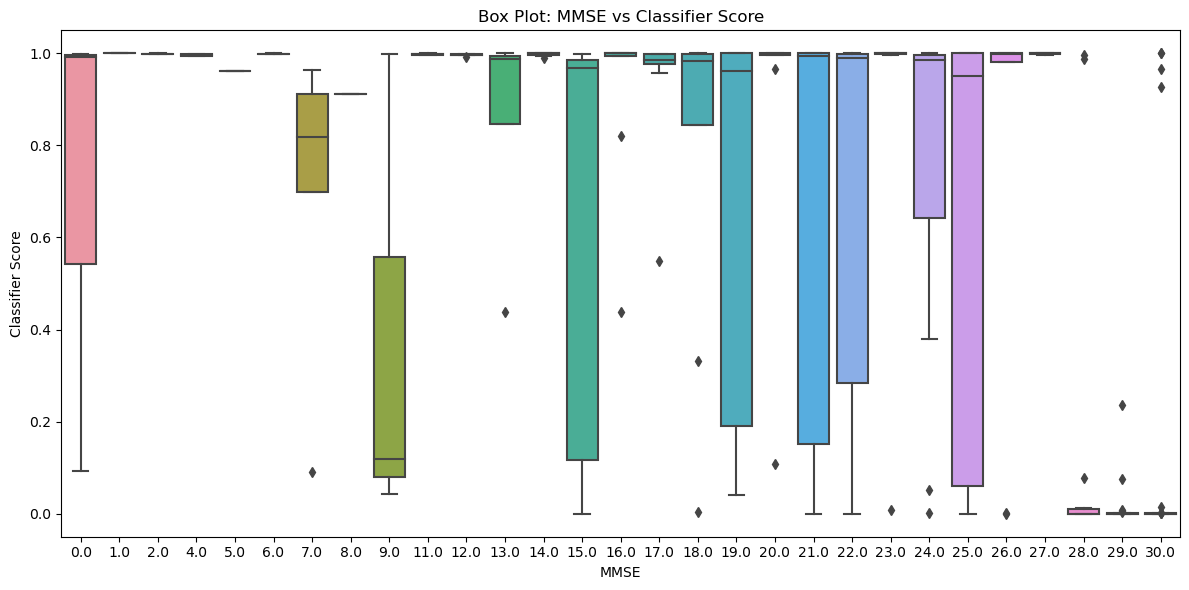

In [45]:
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
sns.boxplot(x=merged_df['MMSE'], y=merged_df['Class Score'])
plt.xlabel('MMSE')
plt.ylabel('Classifier Score')
plt.title('Box Plot: MMSE vs Classifier Score')

plt.tight_layout()  # Adjust the plot spacing
plt.show()


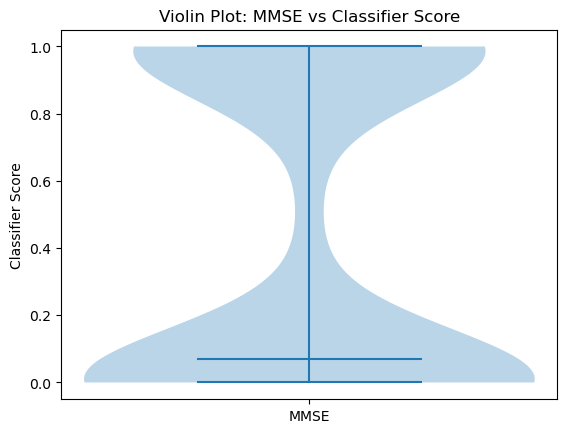

In [46]:
plt.violinplot(merged_df['Class Score'], showmedians=True)
plt.xticks([1], ['MMSE'])
plt.ylabel('Classifier Score')
plt.title('Violin Plot: MMSE vs Classifier Score')
plt.show()


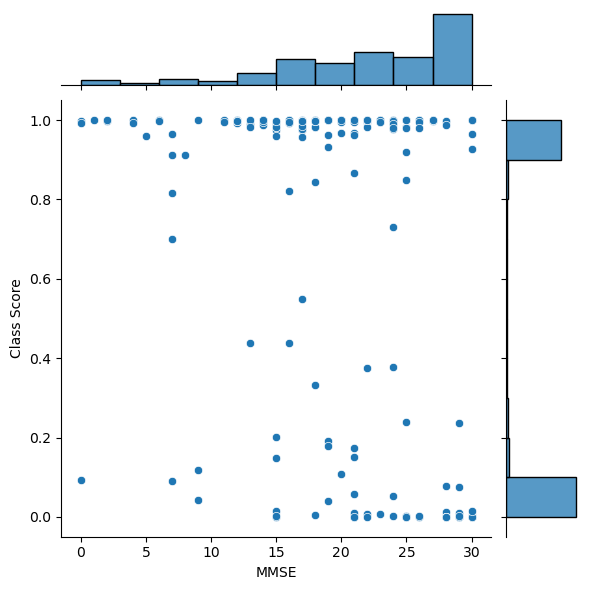

In [47]:
sns.jointplot(x='MMSE', y='Class Score', data=merged_df, kind='scatter')
plt.show()


In [48]:
lin_prob_df = prob_scores_transformed_df_cleaned.merge(linear_scores_transformed_df_cleaned, on='Subject ID')
#print(lin_prob_df)

lin_prob_df.head()


,Subject ID,Prob Score,Linnear Score
0,11174-r1,1.000000,16.264934
1,11178-r1,0.003765,-5.578192
2,11182-r1,0.999649,7.954470
3,11182-r2,0.992923,4.943839
4,11186-r1,0.995734,5.452781


In [49]:
lin_prob_df.to_excel('lin_prob.xlsx', index=False)

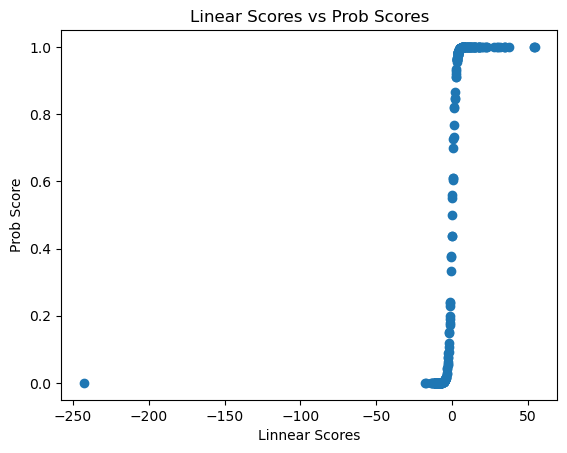

In [50]:
plt.scatter(lin_prob_df['Linnear Score'], lin_prob_df['Prob Score'])
plt.xlabel('Linnear Scores')
plt.ylabel('Prob Score')
plt.title('Linear Scores vs Prob Scores')
plt.show()


### Working with the ClassScore df to do R^2 analysis WE 07/21/2023


In [51]:
from sklearn.metrics import r2_score

In [52]:
Class_MMSE_df.head()

,Sample ID,Class Score,MMSE
0,11174-r1,1.000000,18.0
1,11178-r1,0.003765,18.0
2,11182-r1,0.999649,12.0
3,11182-r2,0.992923,12.0
4,11186-r1,0.995734,23.0


In [53]:
# lists for the two columns. 
class_score = Class_MMSE_df["Class Score"]
mmse = Class_MMSE_df["MMSE"]

In [54]:
# check for any NaN values
nan_in_class_score = class_score.isna().sum()
nan_in_mmse = mmse.isna().sum()

nan_in_class_score, nan_in_mmse

(0, 78)

#### It appears that there are 78 NaN values in the MMSE column, while the Class Score column doesn't contain any NaN values.

##### Remove Rows with NaN:

In [55]:
# Remove rows with NaN values in the MMSE column
filtered_Class_MMSE_df = Class_MMSE_df.dropna(subset=["MMSE"])

# Calculate R^2 with the filtered data
filtered_class_score = filtered_Class_MMSE_df["Class Score"]
filtered_mmse = filtered_Class_MMSE_df["MMSE"]
r_squared_filtered = r2_score(filtered_mmse, filtered_class_score)

r_squared_filtered


-8.555164804565827

##### Class Score does not predict the variation in MMSE well, at least not in a linear manner.

##### We will substitute the missing values in the MMSE column with the mean, median, and mode respectively, and then calculate the R^2 for each scenario.

###### The mean is sensitive to outliers; The median is less sensitive to outliers and can be used in cases where the data is not symmetrical; The mode is used in cases where we suspect that the most frequently appearing value in the data set is likely to be the NaN

In [56]:
# Calculate mean, median, and mode of MMSE
mean_mmse = Class_MMSE_df["MMSE"].mean()
median_mmse = Class_MMSE_df["MMSE"].median()
mode_mmse = Class_MMSE_df["MMSE"].mode()[0]  # mode() returns a Series, so we take the first element

# Assign missing values and calculate R^2 for each scenario
scenarios = ["mean", "median", "mode"]
values = [mean_mmse, median_mmse, mode_mmse]
r2_values = {}

for scenario, value in zip(scenarios, values):
    changed_data = Class_MMSE_df.copy()
    changed_data["MMSE"].fillna(value, inplace=True)
    
    r2_values[scenario] = r2_score(changed_data["MMSE"], changed_data["Class Score"])

r2_values


{'mean': -11.21938275313893,
 'median': -11.439691684736914,
 'mode': -10.325722188933655}

###### So for R^2 values we get the following:
###### 1/ Without adressing the NaN values in the MMSE column - (-8.56)
###### 2/ Replacing the NaN with the Mean value - (-11.22)
###### 3/ Replacing the NaN with the Median value - (-11.44)
###### 4/ Replacing the NaN with the Mode value - (-10.33)

###### All the R^2 values are negative, indicating that the model fits the data worse than a horizontal line, regardless of the substitution method. This suggests that Class Score does not linearly predict the variation in MMSE well.